In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns; sns.set()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



## Cluster 0
Reserve bigs
- Low volume 3pt shooting

## Cluster 1
Reserve wings (3&D / shooting)
- High volume 3pt shooting

## Cluster 2
High impact skilled bigs
- Positive BPM
- 3rd highest usg.

## Cluster 3
High impact dedicated ball handlers
- Positive BPM
- Big assist pct
- 2nd highest usg.

## Cluster 4
Traditional centers
- Bad ft shooting
- Low volume 3pt shooting
- Huge block pct
- Highest dbpm

## Cluster 5
Passing offensive initiators
- Big assist pct

## Cluster 6
Scoring heavy guards

## Cluster 7
Variety post big men
- High block pct
- No 3pt shooting
- Negative BPM

## Cluster 8
Variety wing and bigs (Horford 19, Connaughton 20, Embiid 17, Dirk 13, Boban 19)

## Cluster 9
High usage ball-handling stars
- High impact - large stats
- Highest vorp, bpm, etc
- Stars

## Cluster 10
Non-traditional ball handlers 
- Negative BPM

## Cluster 11
Limited impact Reserve wings
- high volume 3pt shooting
- Negative BPM



In [2]:
df = pd.read_csv('datasets/master_players_stats_bio_clusters_pca.csv', index_col=0)
df.shape
df.sample(5)

(6541, 145)

,player_id,pos,age,team_id,g,mp,per,ts_pct,fg3a_per_fga_pct,fta_per_fga_pct,...,pc_19,pc_20,pc_21,pc_22,pc_23,pc_24,pc_25,pc_26,pc_27,pc_28
player,,,,,,,,,,,,,,,,,,,,,
Darrell Arthur 2015,arthuda01,PF,26,DEN,58,988,11.5,0.466,0.286,0.154,...,0.002253,0.859215,-0.385391,0.166559,-0.697207,0.307897,-0.346763,0.380842,0.679964,-0.115416
Vince Carter 2014,cartevi01,SG,37,DAL,81,1973,15.9,0.539,0.457,0.242,...,0.603494,0.262083,0.117372,0.450168,-0.508939,-0.073784,0.058274,-0.075049,-0.205549,-0.498909
Devin Harris 2018,harride01,PG,34,TOT,71,1340,13.0,0.563,0.500,0.374,...,-0.316184,-0.022333,-0.451133,-0.968535,0.693175,0.465452,-0.297290,-0.271122,-0.295329,-0.036715
Paul George 2014,georgpa01,SF,23,IND,80,2898,20.1,0.555,0.367,0.341,...,-0.370434,-0.784112,0.436614,0.004469,-0.136809,0.396318,0.608413,0.551655,0.024804,0.085545
Langston Galloway 2017,gallola01,PG,25,TOT,74,1495,10.4,0.510,0.565,0.117,...,-0.481356,-0.116810,0.234767,0.302833,-0.240947,-0.069288,0.364623,-0.067394,-0.544678,-0.128363


## Mean players for each cluster

In [10]:
cluster_groups = df.groupby('label')
cluster_groups.mean()

,age,g,mp,per,ts_pct,fg3a_per_fga_pct,fta_per_fga_pct,orb_pct,drb_pct,trb_pct,...,pc_19,pc_20,pc_21,pc_22,pc_23,pc_24,pc_25,pc_26,pc_27,pc_28
label,,,,,,,,,,,,,,,,,,,,,
0,27.241590,68.155963,1545.180428,14.567278,0.523263,0.011171,0.332398,9.484709,18.949541,14.204893,...,-0.242744,0.118424,-0.271410,0.055236,-0.174041,-0.130878,-0.034346,-0.122941,-0.073520,0.011548
1,26.876761,72.576291,1908.225352,12.612559,0.542762,0.435413,0.209566,3.324883,12.446244,7.876995,...,-0.104811,0.046100,0.015041,-0.007379,-0.012861,0.017973,-0.037069,-0.071120,-0.023479,-0.078116
2,26.763485,71.842324,2375.514523,19.253942,0.544568,0.042303,0.353373,8.230290,20.906224,14.595851,...,-0.034269,0.049216,-0.167824,0.035791,-0.152122,-0.155902,0.034121,0.010748,-0.039034,-0.033625
3,26.738583,73.951181,2592.014173,17.849764,0.547647,0.285017,0.292098,2.779685,11.271969,7.037480,...,0.207790,-0.043027,-0.043273,0.004990,0.003191,0.039573,-0.028128,0.044742,0.045771,0.093929
4,26.711268,69.908451,1771.556338,17.377465,0.573789,0.011669,0.555232,11.723944,23.334507,17.551408,...,0.035801,0.157525,-0.175511,0.151379,-0.418017,0.017022,0.351026,-0.054573,-0.093956,0.003300
5,28.124172,66.546358,1594.584437,13.359106,0.519998,0.356444,0.212382,1.839238,9.095199,5.461424,...,0.013906,-0.037088,0.015538,-0.056005,-0.110318,-0.024099,0.095107,-0.161685,0.001433,0.032904
6,26.382677,65.088189,1832.307087,14.988189,0.532027,0.321969,0.280200,2.723150,11.365512,7.029921,...,-0.031374,-0.080895,0.065982,-0.053423,-0.067150,0.002995,-0.131194,-0.094663,-0.047320,-0.172982
7,26.800200,66.779221,1489.058941,14.620080,0.543252,0.002860,0.395970,10.572727,20.313287,15.439660,...,0.038574,-0.022513,0.150432,-0.059179,0.122253,0.039960,-0.033288,-0.008221,-0.012707,-0.005544
8,26.061012,66.561012,1544.331845,14.327232,0.542217,0.219528,0.284482,6.929167,16.962202,11.938095,...,0.043102,0.033061,-0.077104,-0.002887,0.062725,0.056136,-0.043091,-0.029849,0.080202,0.006280


In [4]:
sorted(df.columns)

['age',
 'and1s_per_min',
 'ast_pct',
 'ast_per_poss',
 'astd_pts_per_min',
 'avg_dist',
 'blk_pct',
 'blk_per_poss',
 'bpm',
 'cluster_0',
 'cluster_0_bpm',
 'cluster_1',
 'cluster_10',
 'cluster_10_bpm',
 'cluster_11',
 'cluster_11_bpm',
 'cluster_1_bpm',
 'cluster_2',
 'cluster_2_bpm',
 'cluster_3',
 'cluster_3_bpm',
 'cluster_4',
 'cluster_4_bpm',
 'cluster_5',
 'cluster_5_bpm',
 'cluster_6',
 'cluster_6_bpm',
 'cluster_7',
 'cluster_7_bpm',
 'cluster_8',
 'cluster_8_bpm',
 'cluster_9',
 'cluster_9_bpm',
 'dbpm',
 'def_rtg',
 'drawn_shooting_per_min',
 'drb_pct',
 'drb_per_poss',
 'dws',
 'fg2_pct',
 'fg2_per_poss',
 'fg2a_per_poss',
 'fg3_heave',
 'fg3_pct',
 'fg3_per_poss',
 'fg3a_heave',
 'fg3a_per_fga_pct',
 'fg3a_per_poss',
 'fg_dunk_per_min',
 'fg_pct',
 'fg_pct_00_03',
 'fg_pct_03_10',
 'fg_pct_10_16',
 'fg_pct_16_xx',
 'fg_pct_corner3',
 'fg_pct_fg2a',
 'fg_pct_fg3a',
 'fg_per_poss',
 'fga_per_poss',
 'fouls_offensive_per_min',
 'fouls_shooting_per_min',
 'ft_pct',
 'ft_per

### Types of columns

In [9]:
# easier to do this in vscode than jupyter lab

pbp_cols = ['and1s_per_min',
            'astd_pts_per_min',
            'drawn_shooting_per_min',
            'fg_dunk_per_min',
            'fouls_offensive_per_min',
            'fouls_shooting_per_min',
            'own_shots_blk_per_min',
            'pct_c',
            'pct_pf',
            'pct_pg',
            'pct_sf',
            'pct_sg',
            'plus_minus_net',
            'plus_minus_on',
            'tov_bad_pass_per_min',
            'tov_lost_ball_per_min',
           ]

poss_cols = ['ast_per_poss',
            'blk_per_poss',
            'drb_per_poss',
            'fg2_per_poss',
            'fg2a_per_poss',
            'fg3_per_poss',
            'fg3a_per_poss',
            'fg_per_poss',
            'fga_per_poss',
            'ft_per_poss',
            'fta_per_poss',
            'orb_per_poss',
            'pf_per_poss',
            'pts_per_poss',
            'stl_per_poss',
            'tov_per_poss',
            'trb_per_poss',
            ]

            
shooting_cols = ['avg_dist',
                'fg2_pct',
                'fg3_heave',
                'fg3_pct',
                'fg3a_heave',
                'fg3a_per_fga_pct',
                'fg_pct',
                'fg_pct_00_03',
                'fg_pct_03_10',
                'fg_pct_10_16',
                'fg_pct_16_xx',
                'fg_pct_corner3',
                'fg_pct_fg2a',
                'fg_pct_fg3a',
                'ft_pct',
                'fta_per_fga_pct',
                'pct_ast_fg2',
                'pct_ast_fg3',
                'pct_fg3a_corner3',
                'pct_fga_00_03',
                'pct_fga_03_10',
                'pct_fga_10_16',
                'pct_fga_16_xx',
                'pct_fga_dunk',
                'pct_fga_fg2a',
                'pct_fga_fg3a',
                ]

shooting_location_cols = [
                        'pct_fg3a_corner3',
                        'pct_fga_00_03',
                        'pct_fga_03_10',
                        'pct_fga_10_16',
                        'pct_fga_16_xx',
                        'pct_fga_dunk',
                        'pct_fga_fg2a',
                        'pct_fga_fg3a',
                            ]

shooting_pct_cols = ['fg2_pct',
                    'fg3_pct',
                    'fg3a_per_fga_pct',
                    'fg_pct',
                    'fg_pct_00_03',
                    'fg_pct_03_10',
                    'fg_pct_10_16',
                    'fg_pct_16_xx',
                    'fg_pct_corner3',
                    'fg_pct_fg2a',
                    'fg_pct_fg3a',
                    'ft_pct',
                    'fta_per_fga_pct',
                    'pct_ast_fg2',
                    'pct_ast_fg3',
                    ]


bio_cols = ['g',
            'gs',
            'height',
            'label',
            'mp',
            'nationality',
            'player_id',
            'pos',
            'salary',
            'team_id',
            'weight',
            'year'
            ]
            

adv_cols = ['ast_pct',
            'blk_pct',
            'bpm',
            'dbpm',
            'def_rtg',
            'drb_pct',
            'dws',
            'obpm',
            'off_rtg',
            'orb_pct',
            'ows',
            'per',
            'stl_pct',
            'tov_pct',
            'trb_pct',
            'ts_pct',
            'usg_pct',
            'vorp',
            'ws',
            'ws_per_48',
            ]



In [14]:
cluster_groups.get_group(9)[adv_cols].mean()

ast_pct       19.930982
blk_pct        1.845399
bpm            4.315337
dbpm           0.469018
def_rtg      104.748466
drb_pct       18.746626
dws            3.316258
obpm           3.847853
off_rtg      111.868098
orb_pct        5.162270
ows            6.081902
per           21.863497
stl_pct        1.725767
tov_pct       11.668712
trb_pct       12.008896
ts_pct         0.563199
usg_pct       27.508282
vorp           4.272086
ws             9.395092
ws_per_48      0.168629
dtype: float64

In [15]:
df['label'].value_counts()

7     1001
1      852
11     703
8      672
3      635
6      635
5      604
10     403
0      327
9      326
2      241
4      142
Name: label, dtype: int64

## Visualize cluster differences

In [148]:
def plot_cluster_means_bar(df, stat, ax=None):
    s = sns.barplot(x='label', y=stat, data=df, palette='Paired', ax=ax )  # ci controls the error bars, can be sd, 68, etc. 'ci=None'
    s.set_title(stat + ' by cluster', fontsize=14, )
    s.set_xlabel('Cluster')
    plt.tight_layout()    

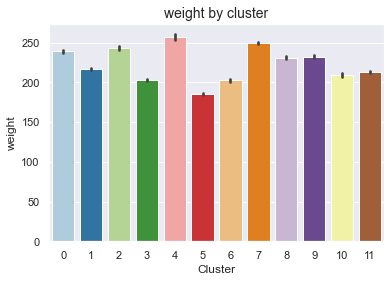

In [146]:
plot_cluster_means_bar(df, 'weight')

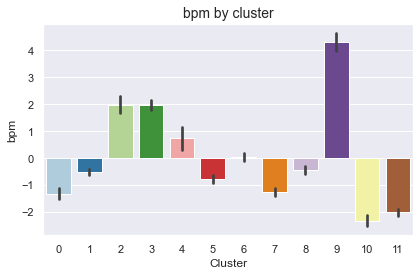

In [138]:
plot_cluster_means_bar(df, 'bpm')

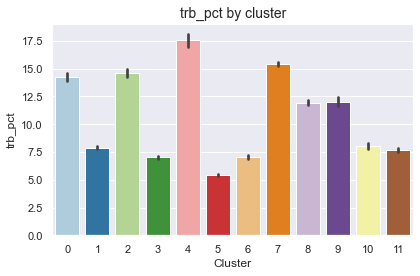

In [139]:
plot_cluster_means_bar(df, 'trb_pct')

In [153]:
df[df['label']==7]['bpm'].sort_values(ascending=False)[0:10]

player
David Robinson 2001    5.2
Yao Ming 2007          5.0
Carlos Boozer 2007     4.6
Bo Outlaw 2000         4.5
Tim Duncan 2011        4.4
Yao Ming 2006          4.4
Rudy Gobert 2017       4.4
Elton Brand 2002       4.3
Rudy Gobert 2015       4.2
Andrew Bynum 2008      4.2
Name: bpm, dtype: float64

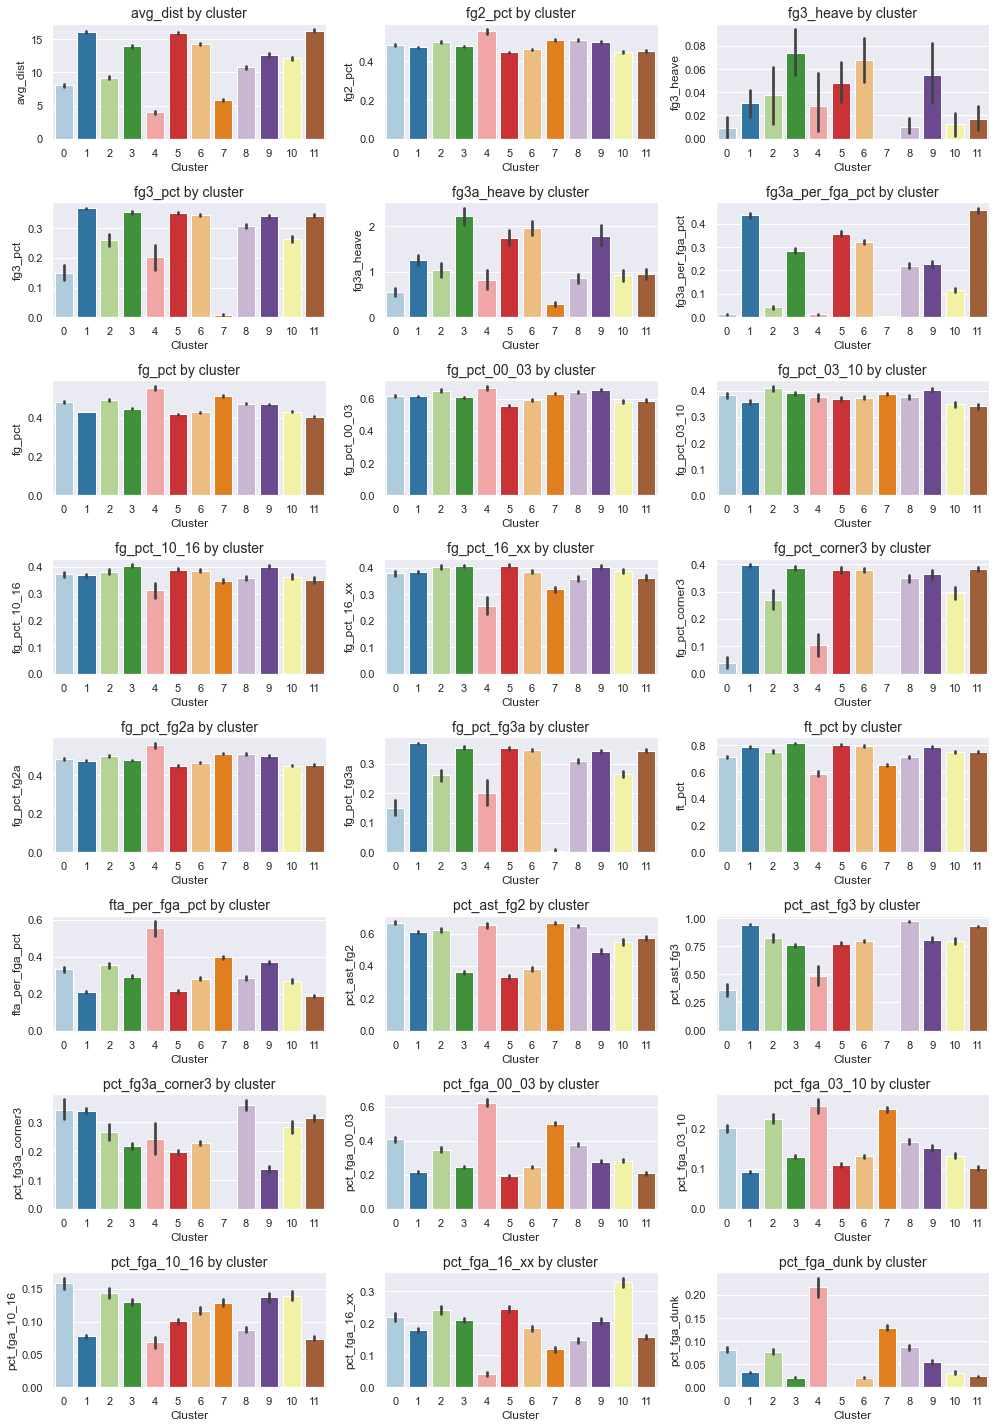

In [159]:
fig, subplots = plt.subplots(nrows=len(shooting_cols)//3, ncols=3, figsize=(14,20))

for col, ax in zip(shooting_cols, subplots.reshape(-1)):
    plot_cluster_means_bar(df, col, ax=ax)

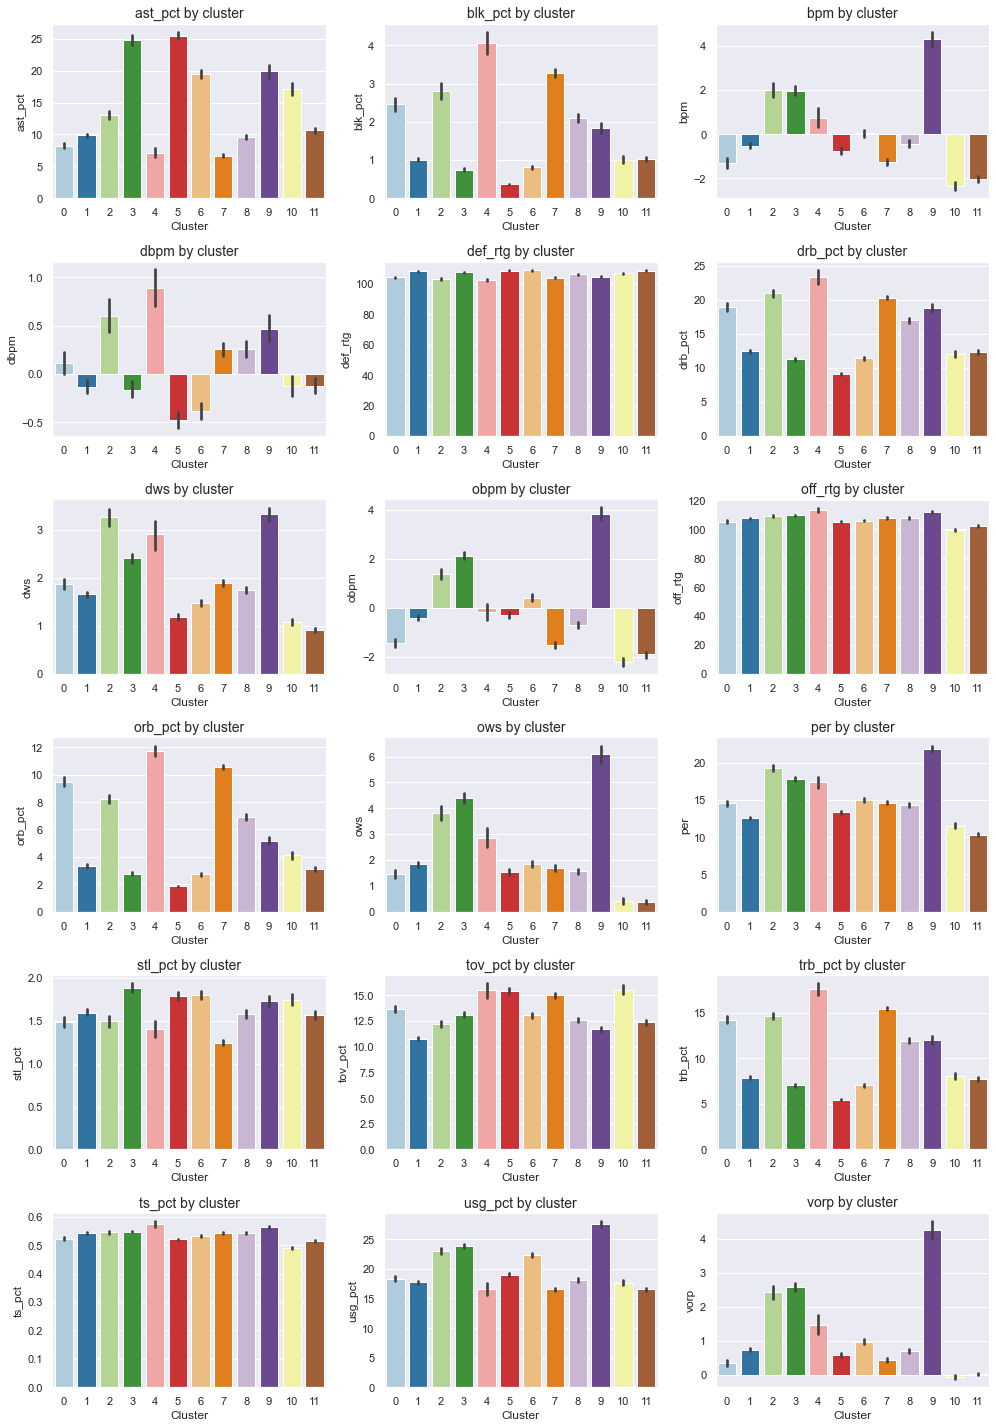

In [155]:
fig, subplots = plt.subplots(nrows=len(adv_cols)//3, ncols=3, figsize=(14,20))

for col, ax in zip(adv_cols, subplots.reshape(-1)):
    plot_cluster_means_bar(df, col, ax=ax)


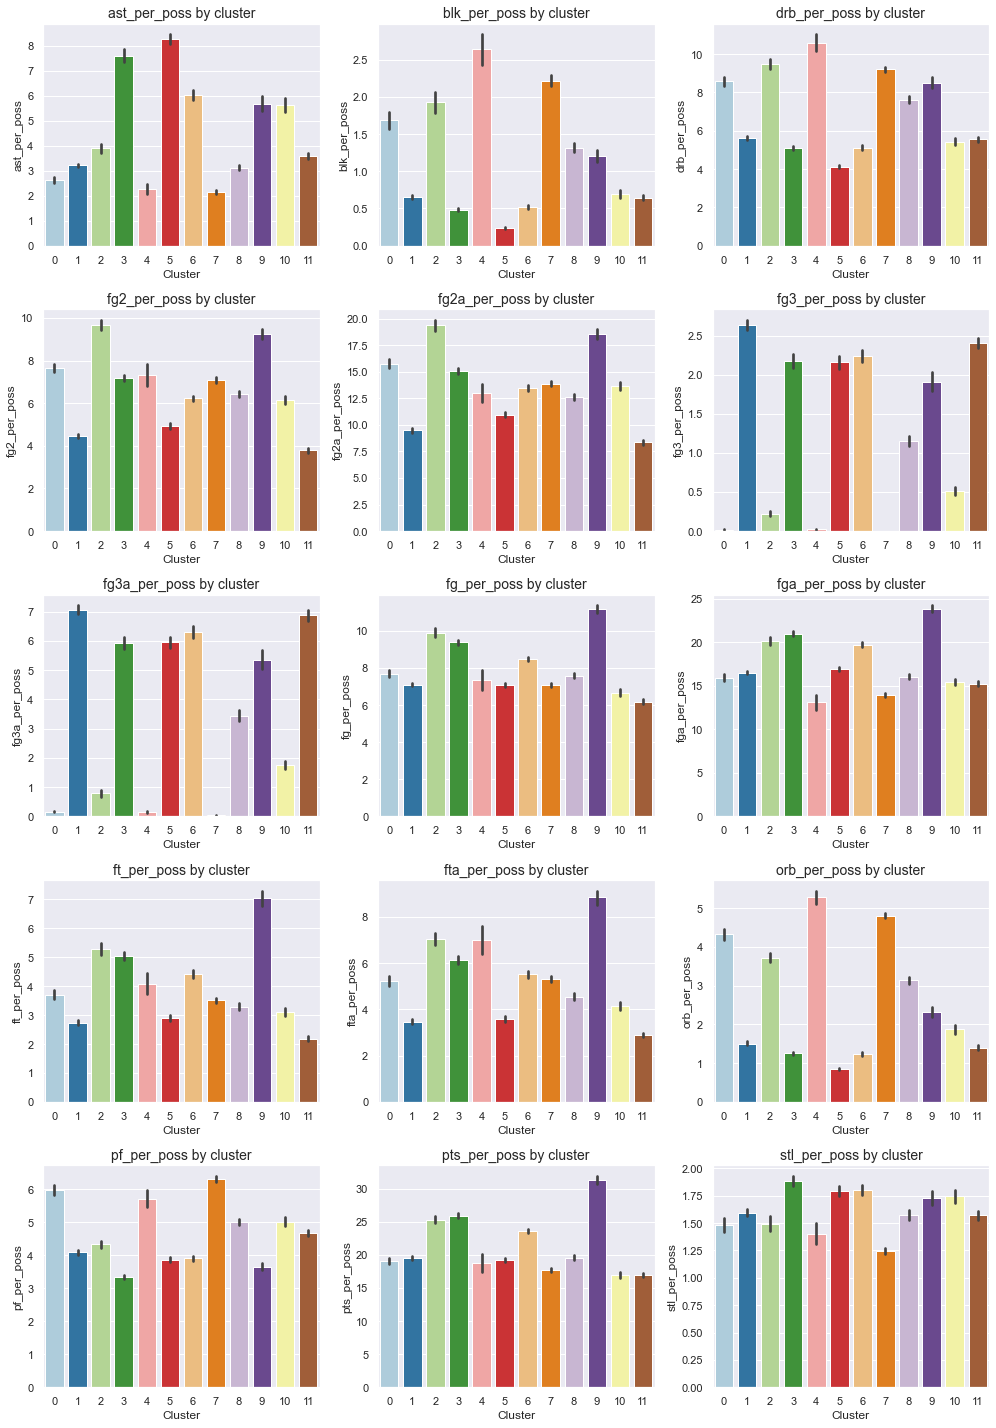

In [299]:
fig, subplots = plt.subplots(nrows=len(poss_cols)//3, ncols=3, figsize=(14,20))

for col, ax in zip(poss_cols, subplots.reshape(-1)):
    plot_cluster_means_bar(df, col, ax=ax)


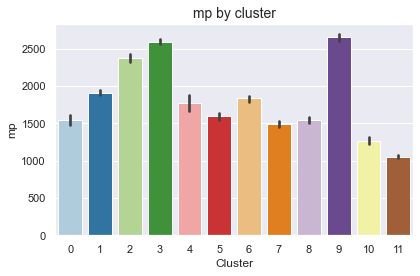

In [189]:
stat= 'mp'
plot_cluster_means_bar(df, stat)

In [301]:
label = 11
stat = 'vorp'
df[df['label']==label][[stat,'mp']].sort_values(by=stat)

,vorp,mp
player,,
Austin Rivers 2013,-1.5,1418
Frank Ntilikina 2018,-1.3,1706
Isaiah Whitehead 2017,-1.3,1643
Nikoloz Tskitishvili 2003,-1.2,1320
Wayne Selden 2019,-1.2,1439
...,...,...
Steve Novak 2012,1.6,1020
Brandon Rush 2012,1.6,1717
Nikola Mirotić 2015,1.8,1654


In [300]:
label = 11
stat = 'vorp'
df[df['label']==label][[stat, 'height']].sample(15)

,vorp,height
player,,
Lamond Murray 2005,0.5,79
Nicolò Melli 2020,0.2,81
Dragan Bender 2018,-0.9,84
Evan Fournier 2014,-0.4,79
Kostas Papanikolaou 2015,0.0,80
Royce O'Neale 2019,0.6,76
LaPhonso Ellis 2002,-0.2,80
Ronnie Price 2011,-0.8,74
Sasha Pavlović 2004,-0.6,80


In [302]:
label = 11
stat = 'bpm'
df[df['label']==label][stat].sort_values(ascending=False)[0:20]

player
Fred Hoiberg 2005          4.1
Steve Novak 2012           4.1
Robert Horry 2006          3.1
George Hill 2020           2.9
Thabo Sefolosha 2018       2.7
Matt Bonner 2012           2.6
Matt Bonner 2010           2.6
Nikola Mirotić 2015        2.3
Ryan Anderson 2010         2.3
Nikola Mirotić 2018        2.2
Luke Kornet 2019           2.1
Robert Horry 2007          2.1
Fred Hoiberg 2004          2.0
Matt Bonner 2011           1.9
Brandon Rush 2012          1.7
Robert Covington 2019      1.6
Dāvis Bertāns 2018         1.6
Nikola Mirotić 2019        1.5
Michael Porter Jr. 2020    1.5
Charlie Villanueva 2015    1.5
Name: bpm, dtype: float64

In [303]:
label = 11
stat = 'bpm'
df[df['label']==label][stat].sort_values(ascending=True)[0:20]

player
Dwayne Bacon 2020           -6.8
Donté Greene 2009           -6.8
Sekou Doumbouya 2020        -6.7
Ronnie Price 2011           -6.3
Ricky Davis 2009            -6.3
Sasha Pavlović 2010         -6.2
Austin Rivers 2013          -6.2
John Starks 2002            -6.2
Paul Zipser 2018            -6.1
Frank Ntilikina 2019        -6.0
Stephen Graham 2009         -6.0
Dewayne Dedmon 2020         -5.8
Lance Thomas 2019           -5.7
Elie Okobo 2019             -5.7
Rashad Vaughn 2016          -5.7
DeShawn Stevenson 2010      -5.6
Toney Douglas 2012          -5.6
Treveon Graham 2020         -5.6
Quincy Lewis 2000           -5.5
Nikoloz Tskitishvili 2003   -5.5
Name: bpm, dtype: float64

In [312]:
# player = 'Steve Nash'
# player = 'DeMarcus Cousins'
player = 'Jae Crowder'
player = 'Avery Bradley'
player = 'Rajon Rondo'
player = 'Kobe'
player = 'Andre Ig'
player = 'Giannis'
player = 'Pat Conn'
player = 'Embiid'
player = 'Ben Simmons'
player = 'Dwight How'
player = 'Klay'
player = 'Draymond'
player = 'Russell West'
player = 'Allen Iverson'
player = 'LeBron'
player = 'Brandon Roy'
player = 'Deron Williams'
player = 'Tyreke Evans'
player = 'Paul George'
player = 'Derek Fisher'
player = 'Tony Parker'
player = 'Victor Ola'
player = 'Bam Ade'
player = 'Clint Cap'
player = 'Dirk'
player = 'Tracy McG'
player = 'Yao'
player = 'Zach Randolph'

df[df.index.str.contains(player)]['label']

player
Zach Randolph 2003    0
Zach Randolph 2004    0
Zach Randolph 2005    0
Zach Randolph 2006    2
Zach Randolph 2007    2
Zach Randolph 2008    2
Zach Randolph 2009    2
Zach Randolph 2010    2
Zach Randolph 2011    2
Zach Randolph 2012    0
Zach Randolph 2013    2
Zach Randolph 2014    2
Zach Randolph 2015    2
Zach Randolph 2016    2
Zach Randolph 2017    8
Zach Randolph 2018    8
Name: label, dtype: int64

In [297]:
df[df['label']==9]['pts_per_poss'].describe()



count    326.000000
mean      31.276994
std        5.790708
min       15.100000
25%       26.800000
50%       31.100000
75%       36.000000
max       48.200000
Name: pts_per_poss, dtype: float64

In [298]:
cluster_groups['pts_per_poss'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,327.0,19.083486,4.639505,7.2,15.75,19.3,22.550,34.5
1,852.0,19.558568,3.819569,9.4,16.90,19.4,22.025,32.1
2,241.0,25.307469,4.572994,12.6,21.90,25.6,28.700,38.4
3,635.0,25.950866,4.885268,12.5,22.50,25.8,29.050,42.5
4,142.0,18.809155,7.888468,4.5,13.00,18.6,24.200,39.2
5,604.0,19.206126,3.815789,9.7,16.40,19.3,21.900,29.1
6,635.0,23.593543,4.558364,12.6,20.40,23.5,26.650,39.8
7,1001.0,17.667133,4.985339,4.8,14.30,17.2,20.900,39.2
8,672.0,19.570685,4.892653,8.4,16.10,19.5,22.600,38.9


In [181]:
cluster_groups[adv_cols].mean().iloc[[4, 7]]

,ast_pct,blk_pct,bpm,dbpm,def_rtg,drb_pct,dws,obpm,off_rtg,orb_pct,ows,per,stl_pct,tov_pct,trb_pct,ts_pct,usg_pct,vorp,ws,ws_per_48
label,,,,,,,,,,,,,,,,,,,,
4,7.154930,4.050704,0.728873,0.886620,102.626761,23.334507,2.902817,-0.157746,113.471831,11.723944,2.845070,17.377465,1.402817,15.468310,17.551408,0.573789,16.640845,1.475352,5.740141,0.148676
7,6.644256,3.268432,-1.255345,0.252947,104.118881,20.313287,1.894006,-1.506294,107.714286,10.572727,1.688312,14.620080,1.243057,14.975025,15.439660,0.543252,16.567133,0.422178,3.581718,0.109945


### Create average df and save

In [315]:
df_mean_players = cluster_groups.mean().copy()
df_mean_players.shape
df_mean_players.to_csv('datasets/mean_player_by_cluster.csv')

(12, 139)